# GeoInfluence of Governors

by [Talha Oz](http://twitter.com/tozCSS) & Manqi Li

This notebook is to report some descriptive statistics on our U.S. Governors dataset. Governors' Twitter account handles are retrieved from https://twitter.com/gov/lists/us-governors/members using [DD-CSS](http://dd-css.com) (this website allows downloading the info in CSV; disclaimer: I built the website).

In [30]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
# read and sort by number of followers
df = pd.read_table('../data/tw_gov.csv',parse_dates=['created_at'])
df = df.sort(columns='followers')
df
# Just to clarify the meanings of two potentially ambiguous field names:
# friends: number of people followed
# statuses: total number of tweets + retweets

,id,screen_name,name,location,description,created_at,friends,followers,statuses,favorites
3,2666591852,NDGovDalrymple,Jack Dalrymple,"Bismarck, ND",Jack Dalrymple is the 32nd Governor of the gre...,2014-07-21 17:21:21,26,332,156,19
0,2916915026,GovHawaii,HI Governor's Office,"Honolulu, HI",The Official Twitter of Hawaii's Office of the...,2014-12-02 21:37:45,444,599,117,32
2,2891165960,GovRicketts,Gov. Pete Ricketts,NaN,40th Governor of Nebraska,2014-11-05 21:15:44,1,740,39,4
1,2915095729,AkGovBillWalker,Governor Bill Walker,Alaska,Official Twitter page of Governor Bill Walker.,2014-11-30 21:47:17,33,985,106,4
4,2303719598,GovMattMead,Governor Matt Mead,Wyoming,Official Twitter Account of Governor Matt Mead...,2014-01-21 21:14:54,17,1341,206,0
9,637143497,Governor_LePage,Paul R. LePage,"Augusta, Maine",The official tweets of Governor Paul LePage. ...,2012-07-16 17:40:36,253,4111,1566,31
11,280121510,ChangeMaryland,Change Maryland,"Annapolis, MD",Bringing fiscal restraint & common sense to MD...,2011-04-10 17:42:54,967,5465,5253,4872
27,111721601,GovernorBullock,Steve Bullock,"Helena, MT",I am proud to serve as Montana's 24th Governor...,2010-02-05 23:11:56,316,5564,2876,52
10,607332953,GovTomblin,Governor Tomblin,NaN,The official Twitter account of West Virginia ...,2012-06-13 16:08:01,98,6038,1671,0
12,269992801,AsaHutchinson,Gov. Asa Hutchinson,Arkansas,"Husband of 41 yrs, Dad of 4, Papaw of 5. Lifel...",2011-03-21 20:32:54,475,6761,1725,72


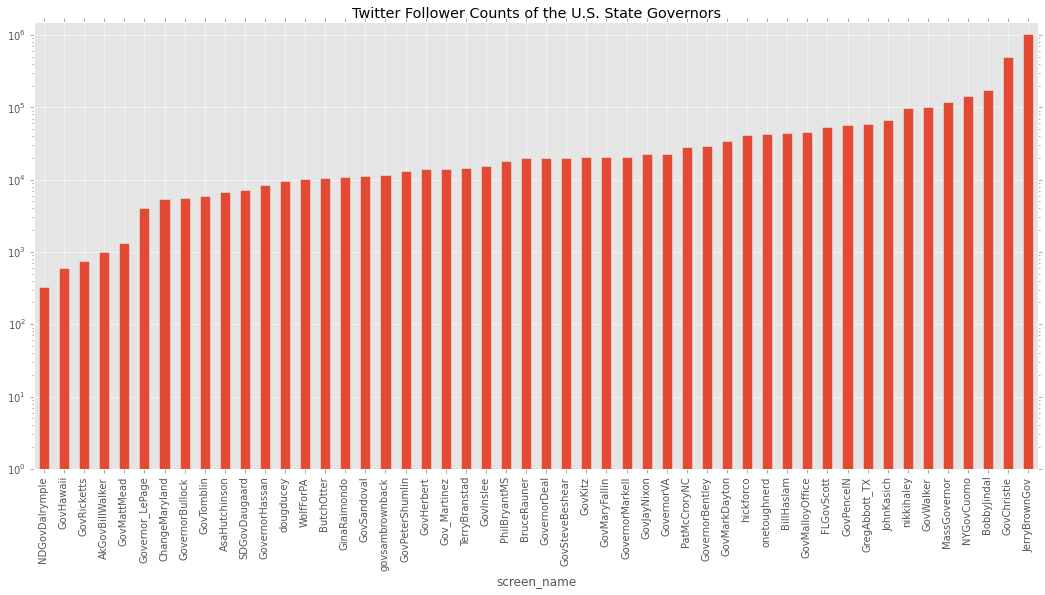

In [6]:
# Beware, the y-axis is in log-scale (see the table above for exact numbers of followers where min. is ~300 and max is ~1M)
df.plot(x='screen_name',y='followers', title='Twitter Follower Counts of the U.S. State Governors',
        kind='bar', legend=False, figsize=(18,8),logy=True,ylim=(1,1500000))

In [9]:
df = pd.read_csv('../data/governors-challengers.csv')
ch = pd.read_table('../data/tw_ch.csv',usecols=['screen_name','followers_count'], encoding='utf-16')
ch = ch.rename(columns={'screen_name':'twch','followers_count':'folch'})
gov = pd.read_table('../data/tw_gov.csv',usecols=['screen_name','followers'])
gov = gov.rename(columns={'screen_name':'twgov','followers':'folgov'})
df = df.merge(gov)
df = df.merge(ch)
# states whose incumbent governors have less followers than their challengers...
df[df['folch']>df['folgov']]

,state,party,since,twgov,twch,shareGov,shareCh,voterCnt,folgov,folch
1,Alaska,I,2014,AkGovBillWalker,SeanParnellAK,48.1,46.4,243597,985,6198
9,Hawaii,D,2014,GovHawaii,DukeAiona2014,49.5,37.1,366125,599,4558
11,Illinois,R,2015,BruceRauner,GovernorQuinn,50.8,45.9,3508302,19654,20236
24,Nebraska,R,2015,GovRicketts,Vote4Chuck,57.6,38.9,524068,740,2169
31,North Dakota,R,2010,NDGovDalrymple,TaylorforND,63.2,34.3,316336,332,594
39,Texas,R,2015,GregAbbott_TX,WendyDavisTexas,59.3,38.9,4707388,58374,171906


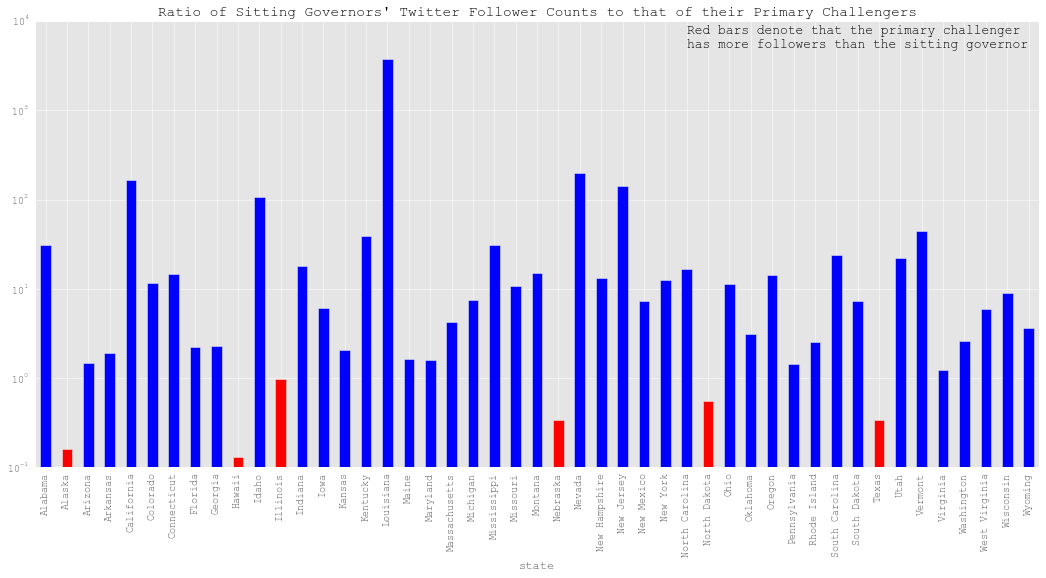

In [52]:
df['odd'] = df['folgov']/df['folch']
df.plot(x='state',y=['odd'],
        title='Ratio of Sitting Governors\' Twitter Follower Counts to that of their Primary Challengers',
        kind='bar', legend=False, figsize=(18,8),logy=True,
        color=df['odd'].apply(lambda x: 'b' if x>1 else 'r'));
plt.text(30,5000,'Red bars denote that the primary challenger\nhas more followers than the sitting governor',fontsize=13);